In [1]:
import os

import pyro
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

import matplotlib.pyplot as plt
from PIL import Image

from RAVDESS_dataset_util import *
from EmoClassCNN import *
from MVAE import *

torch.set_default_dtype(torch.float64)

pyro.enable_validation(False)

In [2]:
folder_path = '/home/studenti/ballerini/datasets/RAVDESS_frames_ds'

In [3]:
img_size = 64
batch_size = 16
num_classes = len(emocat)

face_dataset = FaceEmotionDataset(root_dir=folder_path,
                                    transform=transforms.Compose([
                                        Rescale(img_size), 
                                        CenterCrop(img_size), 
                                        ToTensor()
                                    ]))        

trainingset_len = len(face_dataset) // 100 * 90
testset_len = len(face_dataset) - trainingset_len

print('training set size: ', trainingset_len)
print('test set size: ', testset_len)

train_set, test_set = torch.utils.data.random_split(face_dataset, 
                                                    [trainingset_len, testset_len], 
                                                    #generator=torch.Generator().manual_seed(42)
                                                   )
                                                    
                                                    
dataset_loader = DataLoader(train_set, batch_size=batch_size,
                        shuffle=True, num_workers=20)

testset_loader = DataLoader(train_set, batch_size=batch_size,
                        shuffle=True, num_workers=20)

print(len(face_dataset))

training set size:  8820
test set size:  1047
9867


(64, 64, 3)


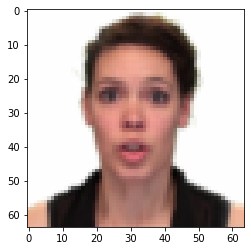

In [4]:
img = np.array(next(iter(face_dataset))['image']).transpose((1, 2, 0))
print(img.shape)
plt.imshow(img)

In [5]:
def emotion_rating_conversion(cat):
    ratings = torch.zeros(num_classes)
    ratings[cat] = 1
    return ratings

In [6]:
import gc

gc.collect()
torch.cuda.empty_cache()
pyro.clear_param_store()

class Args:
    
    learning_rate = 1e-4
    weight_decay = 1e-6
    num_epochs = 35
    z_dim = 64
    ch_size = 16
    
    emotion_dim = num_classes
    img_size = img_size
    seed = 30
    cuda = True
    
args = Args()

# setup the optimizer
adam_args = {"lr": args.learning_rate, "weight_decay":args.weight_decay}
optimizer = Adam(adam_args)

# setup the VAE
mvae = MVAE(z_dim=args.z_dim, 
            emotion_dim = args.emotion_dim,
            img_size=args.img_size, 
            use_cuda=args.cuda,
            ch_size=args.ch_size)

# setup the inference algorithm
svi = SVI(mvae.model, mvae.guide, optimizer, loss=Trace_ELBO())

  3%|▊                            | 1/35 [01:22<46:47, 82.57s/it]

average training loss: 933015.2611


  6%|█▋                           | 2/35 [02:46<45:54, 83.46s/it]

average training loss: 259662.3816


  9%|██▍                          | 3/35 [04:10<44:36, 83.64s/it]

average training loss: 213718.0522


 11%|███▎                         | 4/35 [05:33<43:05, 83.39s/it]

average training loss: 201915.8260


 14%|████▏                        | 5/35 [06:56<41:39, 83.32s/it]

average training loss: 181041.2742


 17%|████▉                        | 6/35 [08:20<40:19, 83.43s/it]

average training loss: 161065.7310


 20%|█████▊                       | 7/35 [09:43<38:52, 83.30s/it]

average training loss: 143951.5085


 23%|██████▋                      | 8/35 [11:06<37:25, 83.15s/it]

average training loss: 137686.3543


 26%|███████▍                     | 9/35 [12:30<36:09, 83.44s/it]

average training loss: 147932.4183


 29%|████████                    | 10/35 [13:53<34:42, 83.31s/it]

average training loss: 134595.8508


 31%|████████▊                   | 11/35 [15:18<33:31, 83.80s/it]

average training loss: 131032.4416


 34%|█████████▌                  | 12/35 [16:41<32:03, 83.65s/it]

average training loss: 134720.9384


 37%|██████████▍                 | 13/35 [18:04<30:34, 83.38s/it]

average training loss: 125376.6490


 40%|███████████▏                | 14/35 [19:27<29:06, 83.19s/it]

average training loss: 134319.5154


 43%|████████████                | 15/35 [20:49<27:37, 82.90s/it]

average training loss: 129007.4180


 46%|████████████▊               | 16/35 [22:12<26:18, 83.10s/it]

average training loss: 121796.8352


 49%|█████████████▌              | 17/35 [23:36<24:59, 83.28s/it]

average training loss: 118316.0422


 51%|██████████████▍             | 18/35 [24:59<23:31, 83.06s/it]

average training loss: 117180.5870


 54%|███████████████▏            | 19/35 [26:20<22:02, 82.67s/it]

average training loss: 113902.4856


 57%|████████████████            | 20/35 [27:43<20:39, 82.66s/it]

average training loss: 113028.3862


 60%|████████████████▊           | 21/35 [29:07<19:21, 82.99s/it]

average training loss: 112804.9000


 63%|█████████████████▌          | 22/35 [30:30<18:01, 83.17s/it]

average training loss: 108548.8721


 66%|██████████████████▍         | 23/35 [31:54<16:38, 83.18s/it]

average training loss: 153352.0356


 69%|███████████████████▏        | 24/35 [33:19<15:21, 83.78s/it]

average training loss: 122845.4795


 71%|████████████████████        | 25/35 [34:42<13:55, 83.56s/it]

average training loss: 113844.4017


 74%|████████████████████▊       | 26/35 [36:04<12:28, 83.16s/it]

average training loss: 118687.1283


 77%|█████████████████████▌      | 27/35 [37:26<11:03, 82.93s/it]

average training loss: 109898.6119


 80%|██████████████████████▍     | 28/35 [38:49<09:39, 82.85s/it]

average training loss: 105144.0409


 83%|███████████████████████▏    | 29/35 [40:11<08:15, 82.66s/it]

average training loss: 105279.9720


 86%|████████████████████████    | 30/35 [41:34<06:53, 82.74s/it]

average training loss: 100651.6700


 89%|████████████████████████▊   | 31/35 [42:58<05:32, 83.09s/it]

average training loss: 102886.9085


 91%|█████████████████████████▌  | 32/35 [44:21<04:09, 83.06s/it]

average training loss: 99972.2974


 94%|██████████████████████████▍ | 33/35 [45:45<02:46, 83.26s/it]

average training loss: 98171.3943


 97%|███████████████████████████▏| 34/35 [47:09<01:23, 83.53s/it]

average training loss: 96386.6706


100%|████████████████████████████| 35/35 [48:34<00:00, 83.26s/it]

average training loss: 101718.3161


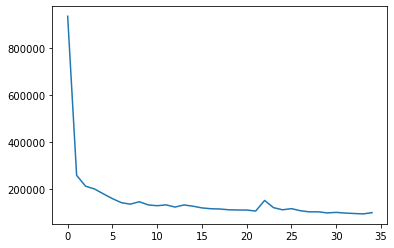

In [7]:
from tqdm import tqdm

train = True
savemodel = False

if train:
    train_elbo = []
    test_elbo = []
    # training loop
    for epoch in tqdm(range(args.num_epochs)):
        epoch_loss = 0.
        for batch_num, sample in enumerate(dataset_loader):

            faces, emotions = sample['image'], sample['cat']
            emotions = torch.stack([emotion_rating_conversion(emo) for emo in emotions])

            # if on GPU put mini-batch into CUDA memory
            if args.cuda:
                faces, emotions = faces.cuda(), emotions.cuda()

            # do ELBO gradient and accumulate loss
            epoch_loss += svi.step(images=faces, emotions=emotions)
            epoch_loss += svi.step(images=faces, emotions=None)
            epoch_loss += svi.step(images=None, emotions=emotions)

        # report training diagnostics
        normalizer_train = len(dataset_loader)
        total_epoch_loss_train = epoch_loss / normalizer_train
        train_elbo.append(total_epoch_loss_train)

        # report training diagnostics
        print("average training loss: %.4f" % (total_epoch_loss_train))
    plt.plot(train_elbo)
else:
    pyro.get_param_store().load('trained_models/mvae_pretrained.save')
    pyro.module("mvae", mvae, update_module_params=True)

In [8]:
if savemodel:
        if not os.path.exists('./trained_models'):
          os.mkdir('./trained_models')
        pyro.get_param_store().save('trained_models/mvae_pretrained.save')

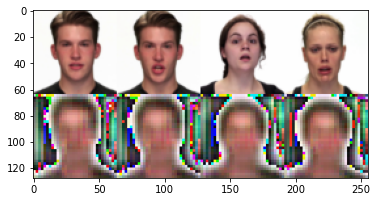

In [12]:
num_samples = 4
input_array = np.zeros(shape=(img_size, 1, 3), dtype="uint8")
reconstructed_array = np.zeros(shape=(img_size, 1, 3), dtype="uint8")
    
# pick NUM_SAMPLES random test images from the first mini-batch and
# visualize how well we're reconstructing them

faces = next(iter(dataset_loader))['image']
if args.cuda:
    faces = faces.cuda()

reco_indices = np.random.randint(0, faces.size(0), num_samples)
for index in reco_indices:
    input_img = faces[index, :]
    # storing the input image
    input_img_display = np.array(input_img.cpu()*255., dtype='uint8')
    input_img_display = input_img_display.transpose((1, 2, 0))
    input_array = np.concatenate((input_array, input_img_display), axis=1)

    # generating the reconstructed image and adding to array
    input_img = input_img.view(1, 3, img_size, img_size)
    reconstructed_img = mvae.reconstruct_img_nosample(input_img)
    reconstructed_img = reconstructed_img.cpu().view(3, img_size, img_size).detach().numpy()
    reconstructed_img = np.array(reconstructed_img*255., dtype='uint8')
    reconstructed_img = reconstructed_img.transpose((1, 2, 0))
    reconstructed_array = np.concatenate((reconstructed_array, reconstructed_img), axis=1)


from PIL import Image
# remove first, blank column, and concatenate
input_array = input_array[:,1:,:]
reconstructed_array = reconstructed_array[:,1:,:]
display_array = np.concatenate((input_array, reconstructed_array), axis=0)
plt.imshow(display_array)

In [13]:
def testBatch(model, dataset_loader, categories):
    sample = next(iter(dataset_loader))
    images = sample['image']
    labels = sample['cat']
    if args.cuda:
        images = images.cuda()
        labels = labels.cuda()

    imageshow(torchvision.utils.make_grid(images))

    batch_size = len(labels)
    
    # img -> z -> img
    # Show the real labels on the screen 
    print('Real labels:', '\t'.join('%5s' % categories[labels[j].item()] for j in range(batch_size)))

    predicted = []
    for image in images:
        output = model.emotion_classifier(input_img)
        predicted.append(torch.argmax(output, 1))

    # Let's show the predicted labels on the screen to compare with the real ones
    print('Predicted:', '\t'.join('%5s' % categories[predicted[j].item()] for j in range(batch_size)))
        
    # img -> z -> emo
    acc = 0
    for i in range(len(labels)):
        if categories[labels[i].item()] == categories[predicted[i].item()]:
            acc += 1
    acc = acc / len(labels)
    print ('img -> z -> emo accuracy: ', acc)
    
    # emo -> z -Z emo
        

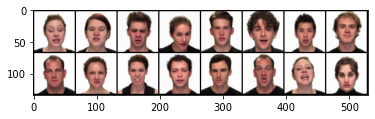

Real labels: surprised	 calm	  sad	angry	neutral	 calm	fearful	happy	angry	happy	disgust	neutral	  sad	fearful	angry	fearful
Predicted:  calm	angry	angry	disgust	angry	  sad	angry	fearful	  sad	  sad	disgust	fearful	disgust	  sad	angry	disgust
img -> z -> emo accuracy:  0.125


In [14]:
testBatch(mvae, testset_loader, emocat)